In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph

REFERÊNCIAS:

- Ester, M., H. P. Kriegel, J. Sander, and X. Xu, “A Density-Based Algorithm for Discovering Clusters in Large Spatial Databases with Noise”. In: Proceedings of the 2nd International Conference on Knowledge Discovery and Data Mining, Portland, OR, AAAI Press, pp. 226-231. 1996

- Schubert, E., Sander, J., Ester, M., Kriegel, H. P., & Xu, X. (2017). DBSCAN revisited, revisited: why and how you should (still) use DBSCAN. ACM Transactions on Database Systems (TODS), 42(3), 19.
 
- Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

LINK TO SCIKIT DOCUMENTATION: https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

Na documentação oficial do scikit-learn você encontrará tutoriais para uso do DBSCAN. O código abaixo é uma cortesia do Davida Sheehan https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/

O objetivo desta prática é observar como calcular clusters com DBSCAN e K-means em dois tipos diferentes de dados.

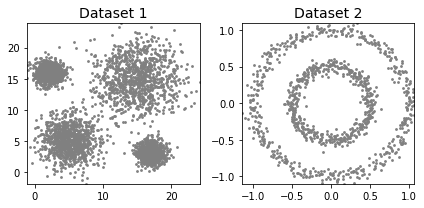

In [10]:
#Vamos criar um conjunto de dados com 4 clusters 
# (Você pode usar também o comando make_blobs para isso)
np.random.seed(844)
clust1 = np.random.normal(5, 2, (1000,2))
clust2 = np.random.normal(15, 3, (1000,2))
clust3 = np.random.multivariate_normal([17,3], [[1,0],[0,1]], 1000)
clust4 = np.random.multivariate_normal([2,16], [[1,0],[0,1]], 1000)
dataset1 = np.concatenate((clust1, clust2, clust3, clust4))

# Aqui usaremos o comando make_circles para criar o dataset2. 
#Observe que estamos usando o primeiro array [0], já que o segundo [1]
# contém as labels de qual cluster aquela amostra pertence
dataset2 = datasets.make_circles(n_samples=1000, factor=.5, noise=.05)[0]

# plots
def cluster_plots(set1, set2, colours1 = 'gray', colours2 = 'gray', 
                  title1 = 'Dataset 1',  title2 = 'Dataset 2'):
    fig,(ax1,ax2) = plt.subplots(1, 2)
    fig.set_size_inches(6, 3)
    ax1.set_title(title1,fontsize=14)
    ax1.set_xlim(min(set1[:,0]), max(set1[:,0]))
    ax1.set_ylim(min(set1[:,1]), max(set1[:,1]))
    ax1.scatter(set1[:, 0], set1[:, 1],s=8,lw=0,c= colours1)
    ax2.set_title(title2,fontsize=14)
    ax2.set_xlim(min(set2[:,0]), max(set2[:,0]))
    ax2.set_ylim(min(set2[:,1]), max(set2[:,1]))
    ax2.scatter(set2[:, 0], set2[:, 1],s=8,lw=0,c=colours2)
    fig.tight_layout()
    plt.show()

cluster_plots(dataset1, dataset2)


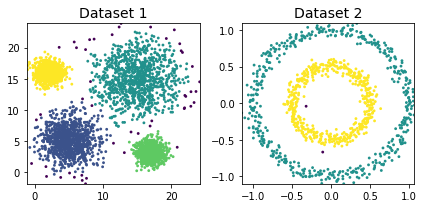

Dataset1:
Number of Noise Points: 47 (4000)
Dataset2:
Number of Noise Points: 2 (1000)


In [11]:
# Comando fit_predict para DBSCAN
#Precisamos fornecer o raio (eps), k e a métrica utilizada
dbscan_dataset1 = cluster.DBSCAN(eps=1, min_samples=5, metric='euclidean').fit_predict(dataset1)
dbscan_dataset2 = cluster.DBSCAN(eps=0.1, min_samples=5, metric='euclidean').fit_predict(dataset2)
cluster_plots(dataset1, dataset2, dbscan_dataset1, dbscan_dataset2)


# Os pontos considerados ruído são rotulados como -1
print('Dataset1:')
print("Number of Noise Points: ",sum(dbscan_dataset1==-1)," (",len(dbscan_dataset1),")",sep='')
print('Dataset2:')
print("Number of Noise Points: ",sum(dbscan_dataset2==-1)," (",len(dbscan_dataset2),")",sep='')


Dataset1
Cluster 0: 1022
Cluster 1: 1018
Cluster 2: 952
Cluster 3: 1008


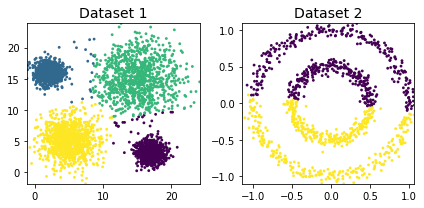

In [12]:
#Agora com k-means clustering
# Precisamos fornecer k (número de clusters) e a quantidade máxima de iterações
kmeans_dataset1 = cluster.KMeans(n_clusters=4, max_iter=300, 
                                 init='k-means++',n_init=10).fit_predict(dataset1)
kmeans_dataset2 = cluster.KMeans(n_clusters=2, max_iter=300, 
                                 init='k-means++',n_init=10).fit_predict(dataset2)
print('Dataset1')
print(*["Cluster "+str(i)+": "+ str(sum(kmeans_dataset1==i)) for i in range(4)], sep='\n')
cluster_plots(dataset1, dataset2, 
              kmeans_dataset1, kmeans_dataset2)


# O método do cotovelo

É importante reiterar que uma desvantagem do k-means é que temos que especificar o número de clusters, k, antes de sabermos qual é o k ótimo. O número de clusters a serem escolhidos nem sempre é tão óbvio em aplicações reais, especialmente se estivermos trabalhando com um conjunto de dados de dimensão mais alta que não pode ser visualizado.

O método do cotovelo é uma ferramenta gráfica útil para estimar o número ótimo de clusters k para uma determinada tarefa. Intuitivamente, podemos dizer que, se k aumentar, a SSE dentro do cluster (“distorção”) diminuirá. Isso ocorre porque as amostras estarão mais próximas dos centroides aos quais são atribuídas.

A ideia por trás do método do cotovelo é identificar o valor de k onde a distorção começa a diminuir mais rapidamente, o que ficará mais claro se plotarmos a distorção para diferentes valores de k.

## Glossário

Inércia: Soma das distâncias quadradas das amostras até o centro do cluster mais próximo, ponderado pelos pesos das amostras, se fornecido.

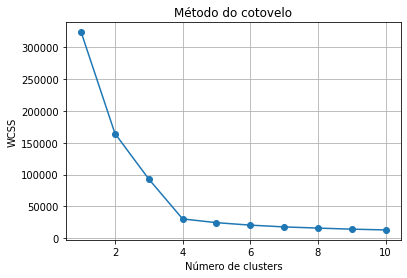

In [22]:
wcss = []
for i in range(1, 11):
    kmeans = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(dataset1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss,'-o')
plt.title('Método do cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()